金融工学は主にリスク管理とデリバティブ（オプションなど）の価格計算に強く関わる分野です。特に以下の2つのテーマが中心になります。

1. リスク管理

金融機関や投資家は、リスクを適切に測定し管理する必要があります。

- 市場リスク（株価・金利・為替の変動）
- 信用リスク（債務不履行の可能性）
- 流動性リスク（取引コストや市場の流動性）
- オペレーショナルリスク（システム障害、詐欺など）

これらを定量的に分析するために、VaR（Value at Risk） や CVAR（Conditional Value at Risk） などの指標が使われます。また、リスクをヘッジするためのデリバティブ（オプションやスワップ）が重要な役割を果たします。

2. デリバティブ（オプションなど）の価格計算

オプションや先物のようなデリバティブは、金融工学の中心的な研究対象です。

- ブラック・ショールズ方程式（オプション価格の理論モデル）
- 確率微分方程式（SDE）を用いたモデル（幾何ブラウン運動、Hestonモデルなど）
- 数値計算（モンテカルロ法・有限差分法）

デリバティブはリスク管理の手段としても使われるため、リスクの計算と密接に結びついています。例えば、デルタ・ガンマ・ベガといったグリークス を計算し、リスクを評価することも重要なタスクです。

3. なぜ金融工学はリスクとオプションの計算が多いのか？

- 金融市場は不確実性が高いため、リスクを定量化する必要がある
- リスクを管理・制御する手段としてデリバティブ（特にオプション）が活用される
- デリバティブの価格を正しく計算しないと、市場での取引が成立しない

そのため、金融工学では「リスク計測」と「オプション価格計算」が主要なテーマになりやすいのです。

# 金融工学における証券価格の扱い
1. 価格予測は基本的にしない（伝統的な金融工学）

- ブラック・ショールズモデルや確率微分方程式（SDE）は、価格が確率過程に従うという前提で構築されています。
- 「未来の価格を予測する」のではなく、「リスクを管理するために、確率的な分布を理解する」ことが目的。
- 例えば、オプション価格の計算では、「市場の現在の情報から、将来の確率分布を考慮して適正価格を求める」 というアプローチを取る。

2. クオンツが関わる予測モデル（アルファ戦略）

- ヘッジファンドや高頻度取引（HFT）では、統計的手法や機械学習を用いた価格予測が行われる。
- 例えば、時系列解析（ARIMA、GARCH）や機械学習（LSTM、強化学習）を使って、短期的な価格変動を予測することがある。
- ただし、これらは**金融工学（Financial Engineering）というよりは、クオンツ投資（Quantitative Trading）** の領域に近い。

3. 価格予測 vs. リスク管理の違い
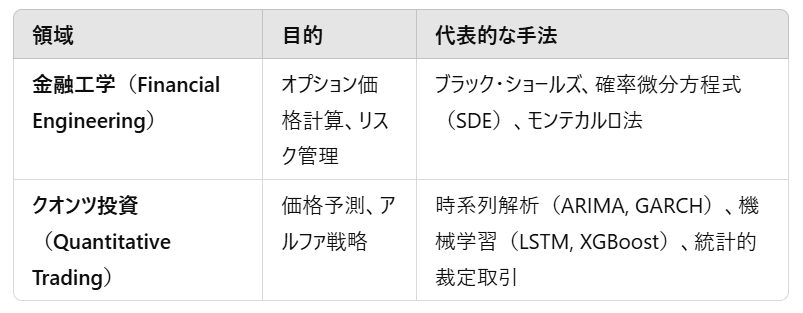


クオンツ投資（Quantitative Trading）は、数学・統計・プログラミングを駆使して市場の価格変動を分析し、収益を狙う投資手法です。以下に、その全体像を体系的にまとめます。

# クオンツ投資の全体像

1. クオンツ投資の基本概念
- 市場の非効率性を発見し、アルゴリズムで取引を行う
- ファンダメンタル分析ではなく、データに基づいた取引戦略を用いる
- 裁量ではなく、ルールベースでシステマチックに運用

2. クオンツ投資の主要戦略

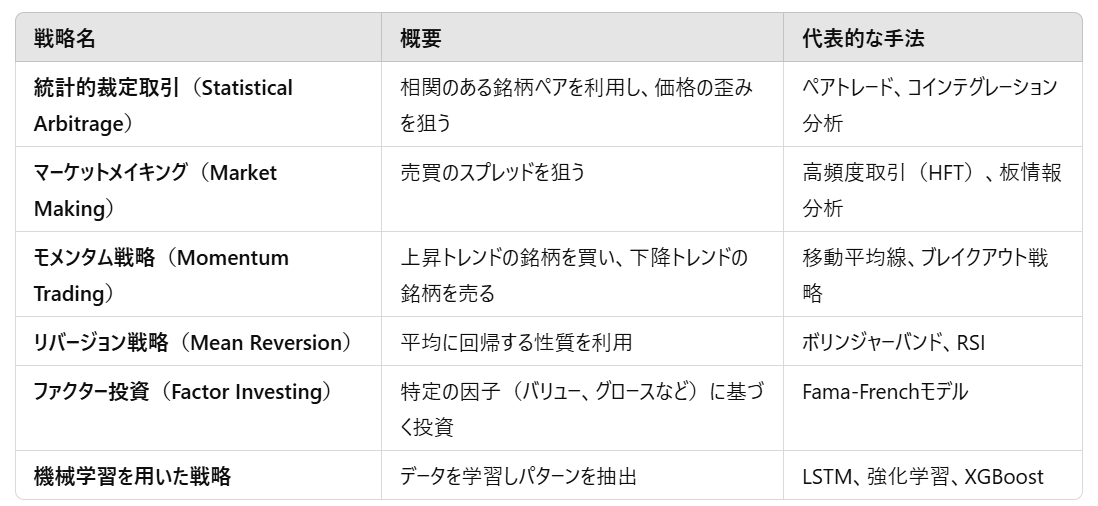

クオンツ投資におけるプログラミング戦略は、大きく**ルールベース戦略**と**機械学習戦略**の2つに分かれます。それぞれの具体的な実装手法を解説します。



# ルールベース戦略（Rule-Based Strategies）

数学・統計を用いたシンプルな戦略で、主に時系列解析やテクニカル分析を活用します。

### 1. モメンタム戦略（Momentum Trading）
価格が上昇トレンドにある場合は買い、下降トレンドにある場合は売る。

In [7]:
import pandas as pd
import numpy as np

# データの読み込み（時系列データ）
df = pd.read_csv(r"C:\Users\20222305\ILLARTS_Works\Python\practice_to_be_exchange_student\data\Stock_data.csv", 
                 index_col="Date", parse_dates=True)

# カラム確認
print(df.head())  # カラム名をチェック

# 10日移動平均と50日移動平均を計算
df["MA10"] = df["Close"].rolling(window=10).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()

# NaNを削除（最初の50行など）
df.dropna(inplace=True)

# ゴールデンクロス・デッドクロス戦略
df["Signal"] = np.where(df["MA10"] > df["MA50"], 1, -1)

# 出力
print(df)


              Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

            Turnover (Lacs)  
Date                         
2018-09-28          7162.35  
2018-09-27         11859.95  
2018-09-26          5248.60  
2018-09-25          5503.90  
2018-09-24          7999.55  
              Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-07-17  241.55  251.85  240.30  247.50  247.90               3158004   
2018-07-16  257.90  257.90  2

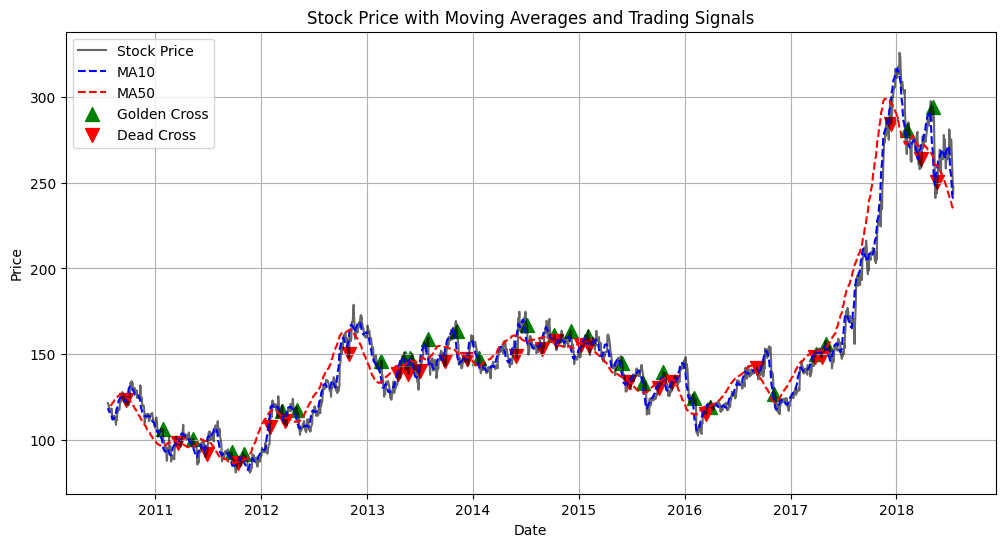

In [9]:
import matplotlib.pyplot as plt


# シグナルの計算
df["Signal"] = np.where(df["MA10"] > df["MA50"], 1, -1)

# ゴールデンクロス・デッドクロスのポイントを特定
golden_cross = (df["Signal"].diff() > 0)  # ゴールデンクロス（-1→1 の変化）
dead_cross = (df["Signal"].diff() < 0)  # デッドクロス（1→-1 の変化）

# グラフの描画
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Stock Price", color="black", alpha=0.6)
plt.plot(df.index, df["MA10"], label="MA10", color="blue", linestyle="--")
plt.plot(df.index, df["MA50"], label="MA50", color="red", linestyle="--")

# ゴールデンクロス（緑の点）
plt.scatter(df.index[golden_cross], df["Close"][golden_cross], color="green", marker="^", label="Golden Cross", alpha=1, s=100)

# デッドクロス（赤の点）
plt.scatter(df.index[dead_cross], df["Close"][dead_cross], color="red", marker="v", label="Dead Cross", alpha=1, s=100)

# グラフの装飾
plt.title("Stock Price with Moving Averages and Trading Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

# 表示
plt.show()


- MA10（短期移動平均）がMA50（長期移動平均）を上抜いたら買い
- MA10がMA50を下抜いたら売り

このコードの動作

✅ 株価と移動平均線をプロット

✅ ゴールデンクロス（買いシグナル）を緑の点で表示

✅ デッドクロス（売りシグナル）を赤の点で表示

✅ わかりやすいラベル・グリッド付き

### 2. 統計的裁定（ペアトレード）
相関の高い2銘柄（例：ゴールドETFと金鉱株ETF）を比較し、価格の乖離を利用して売買。

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# ===== 1. Yahoo Financeからデータを取得 =====
stock_A = "MSFT"  # Microsoft
stock_B = "AAPL"  # Apple

# 過去2年分のデータを取得
start_date = "2022-01-03"
end_date = "2024-01-03"
df_A = yf.download(stock_A, start=start_date, end=end_date)
df_B = yf.download(stock_B, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
print(df_A)

print(df_B)

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2022-01-03  326.287720  329.455562  321.443357  326.872558  28865100
2022-01-04  320.692871  326.726395  317.875914  326.365723  32674300
2022-01-05  308.382080  317.827124  307.992198  317.622411  40054300
2022-01-06  305.945343  310.643504  303.615746  305.233786  39646100
2022-01-07  306.101257  308.499062  302.251099  306.208462  32720000
...                ...         ...         ...         ...       ...
2023-12-26  371.879150  374.142226  370.727757  372.216623  12673100
2023-12-27  371.293518  372.276160  370.042861  370.916334  14905400
2023-12-28  372.494507  373.665741  371.382825  372.583835  14327000
2023-12-29  373.248871  374.360553  370.707875  373.209159  18723000
2024-01-02  368.117249  373.109913  364.047674  371.085046  25258600

[502 rows x 5 columns]
Price     

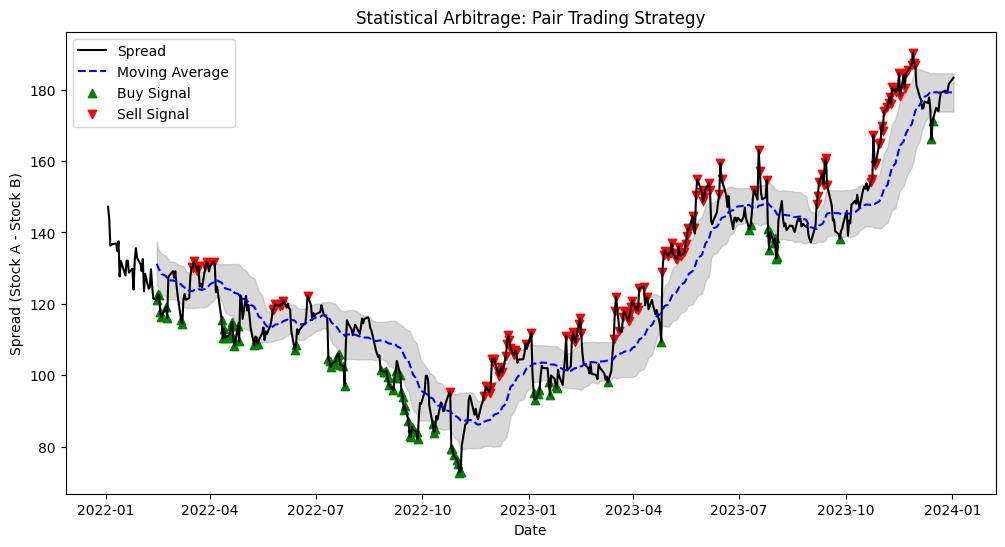

In [19]:

# 終値のみを使用
df = pd.DataFrame()
df["Stock_A"] = df_A["Close"]
df["Stock_B"] = df_B["Close"]

# ===== 2. スプレッドの計算 =====
df["Spread"] = df["Stock_A"] - df["Stock_B"]

# ===== 3. 移動平均と標準偏差を計算 =====
window = 30  # 移動平均の期間
df["Spread_MA"] = df["Spread"].rolling(window=window).mean()
df["Spread_STD"] = df["Spread"].rolling(window=window).std()

# 上下の閾値を設定（±1標準偏差）
df["Upper"] = df["Spread_MA"] + df["Spread_STD"]
df["Lower"] = df["Spread_MA"] - df["Spread_STD"]

# ===== 4. 取引シグナルの発生 =====
df["Long_Signal"] = df["Spread"] < df["Lower"]  # 価格が閾値より下 → 買い
df["Short_Signal"] = df["Spread"] > df["Upper"]  # 価格が閾値より上 → 売り

# ===== 5. 結果の可視化 =====
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Spread"], label="Spread", color="black")
plt.plot(df.index, df["Spread_MA"], label="Moving Average", linestyle="dashed", color="blue")
plt.fill_between(df.index, df["Upper"], df["Lower"], color="gray", alpha=0.3)

# 売買ポイントをプロット
plt.scatter(df.index[df["Long_Signal"]], df["Spread"][df["Long_Signal"]], label="Buy Signal", marker="^", color="green", alpha=1)
plt.scatter(df.index[df["Short_Signal"]], df["Spread"][df["Short_Signal"]], label="Sell Signal", marker="v", color="red", alpha=1)

plt.legend()
plt.title("Statistical Arbitrage: Pair Trading Strategy")
plt.xlabel("Date")
plt.ylabel("Spread (Stock A - Stock B)")
plt.show()


- スプレッドが平均から大きく上振れたらショート（売り）
- スプレッドが平均から大きく下振れたらロング（買い）

📌 コードのポイント

✅ Microsoft（MSFT）とApple（AAPL）の株価を比較

✅ スプレッドが1σ以上のときに売り（ショート）

✅ スプレッドが1σ以下のときに買い（ロング）

✅ 売買シグナルをプロットし、視覚的に確認

📌 実行結果（グラフのイメージ）

黒線：スプレッド（価格差）

青線：スプレッドの移動平均

灰色の帯：±1σの範囲

緑の▲：買いシグナル（Long）

赤の▼：売りシグナル（Short）

### 3. ボラティリティブレイクアウト戦略
一定期間の価格変動（ボラティリティ）が一定の閾値を超えた場合にエントリーする。

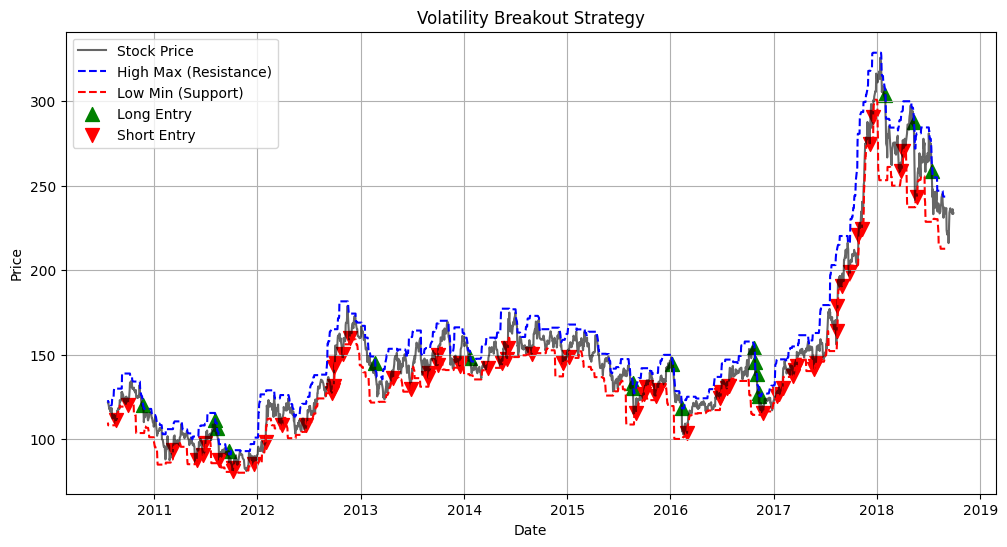

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み
df = pd.read_csv(r"C:\Users\20222305\ILLARTS_Works\Python\practice_to_be_exchange_student\data\Stock_data.csv", 
                 index_col="Date", parse_dates=True)

# ボラティリティ・ブレイクアウト用の期間（例：20日）
lookback = 20

# 最高値・最安値を計算
df["High_max"] = df["High"].rolling(window=lookback).max()
df["Low_min"] = df["Low"].rolling(window=lookback).min()

# ブレイクアウトシグナル（価格が過去の高値を超えたら買い、安値を下回ったら売り）
df["Long_Signal"] = df["Close"] > df["High_max"].shift(1)  # 買いシグナル
df["Short_Signal"] = df["Close"] < df["Low_min"].shift(1)   # 売りシグナル

# グラフの描画
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Stock Price", color="black", alpha=0.6)
plt.plot(df.index, df["High_max"], label="High Max (Resistance)", color="blue", linestyle="--")
plt.plot(df.index, df["Low_min"], label="Low Min (Support)", color="red", linestyle="--")

# 買いシグナル（緑の点）
plt.scatter(df.index[df["Long_Signal"]], df["Close"][df["Long_Signal"]], 
            color="green", marker="^", label="Long Entry", alpha=1, s=100)

# 売りシグナル（赤の点）
plt.scatter(df.index[df["Short_Signal"]], df["Close"][df["Short_Signal"]], 
            color="red", marker="v", label="Short Entry", alpha=1, s=100)

# グラフの装飾
plt.title("Volatility Breakout Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

# 表示
plt.show()


価格変動が異常に大きいと判断したらトレンドフォローのポジションを取る


このコードの動作

✅ 過去 20日間の最高値・最安値 を計算（High_max & Low_min）

✅ 価格が高値を超えたら「買いエントリー」（緑の^）

✅ 価格が安値を下回ったら「売りエントリー」（赤のv）

✅ レンジ（青線 & 赤線）を可視化し、ブレイクアウトの瞬間を確認可能